# Venn diagram

create Venn diagram showing overlapping mass spectral features selected through hypergeometric testing, univariate correlation analysis and LASSO regression

load libraries

In [13]:
import matplotlib.pyplot as plt
import matplotlib_venn as venn
import pandas as pd

load univariate results

In [2]:
uc = pd.read_csv('../CorrelationAnalysis/KendallsTauCorrelation_pval_GA_1000Perm.txt', sep = '\t')

load LASSO regression results

In [4]:
lr = pd.read_csv('../LASSO/_coefs.csv', sep = ',')

load hypergeometric testing results

In [5]:
hg = pd.read_csv('../HyperGeometricTesting/output.csv', sep = ',')

In [6]:
hg.head()

,node,sig,p_neigh,sig_neigh,hits
0,48,False,1.000000,False,NaN
1,73,False,0.145081,False,NaN
2,74,False,1.000000,False,NaN
3,84,False,0.833621,False,NaN
4,100,False,1.000000,False,NaN


In [7]:
ucsig = set(uc[uc['n_below005'] >= 130]['clusterID'])

In [8]:
len(ucsig)

1459

In [9]:
hgsig = set(hg[hg['sig_neigh'] == True]['node'])

In [10]:
len(hgsig)

617

In [11]:
lassosig = set(lr['#OTU ID'].astype('int'))

In [12]:
len(lassosig)

83

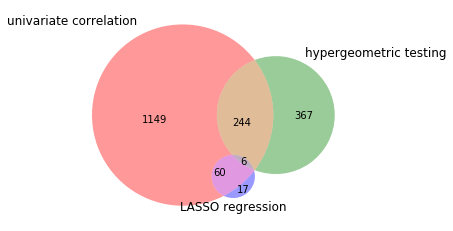

In [15]:
f = plt.figure()
s = {1,2,3,4}
t = {3,5,4,8}
venn.venn3([ucsig,hgsig,lassosig],set_labels=('univariate correlation','hypergeometric testing','LASSO regression'))
plt.show()

In [16]:
f.savefig("VennDiagram.pdf", bbox_inches='tight')

In [17]:
lassosig & ucsig & hgsig

{1764, 2710, 3341, 5917, 6730, 7139}